In [1]:
import pandas as pd
df = pd.read_csv('DakPrescott.csv')
df = df.dropna()

print(df.head())

    Rk    Year       Date   G#  Week     Age Team  Opp   Result   Cmp   Att  \
0  1.0  2016.0  9/11/2016  1.0   1.0  23.044  DAL  NYG  L 19-20  25.0  45.0   
1  2.0  2016.0  9/18/2016  2.0   2.0  23.051  DAL  WAS  W 27-23  22.0  30.0   
2  3.0  2016.0  9/25/2016  3.0   3.0  23.058  DAL  CHI  W 31-17  19.0  24.0   
3  4.0  2016.0  10/2/2016  4.0   4.0  23.065  DAL  SFO  W 24-17  23.0  32.0   
4  5.0  2016.0  10/9/2016  5.0   5.0  23.072  DAL  CIN  W 28-14  18.0  24.0   

    Cmp%  Pass_Yds  Pass_TD  Int  Passer_rating   Sk   Yds    Y/A   AY/A  
0  55.56     227.0      0.0  0.0           69.4  0.0   0.0   5.04   5.04  
1  73.33     292.0      0.0  0.0          103.7  4.0  14.0   9.73   9.73  
2  79.17     248.0      1.0  0.0          123.6  0.0   0.0  10.33  11.17  
3  71.88     245.0      2.0  0.0          114.7  2.0  11.0   7.66   8.91  
4  75.00     227.0      1.0  0.0          117.9  1.0   5.0   9.46  10.29  


In [2]:
nummerical_cols = ['Age', 'Cmp', 'Att', 'Cmp%', 'Pass_Yds', 'Pass_TD', 'Int', 'Passer_rating', 'Sk', 'Y/A']
features = df[nummerical_cols]

pd.set_option('display.float_format', '{:,.2f}'.format)
print(features.describe(percentiles=[0.25,.5,.75]))

         Age    Cmp    Att   Cmp%  Pass_Yds  Pass_TD    Int  Passer_rating  \
count 120.00 120.00 120.00 120.00    120.00   120.00 120.00         120.00   
mean   26.72  22.81  34.14  67.15    258.84     1.75   0.67          98.55   
std     2.55   6.24   8.85   9.53     84.82     1.27   0.83          26.72   
min    23.04   4.00   8.00  37.84     37.00     0.00   0.00          30.40   
25%    24.15  19.00  27.00  61.54    207.75     1.00   0.00          80.77   
50%    26.13  22.00  33.00  66.67    249.50     2.00   0.00         101.05   
75%    29.12  27.00  39.00  72.64    295.25     3.00   1.00         116.67   
max    31.08  42.00  58.00  88.89    502.00     5.00   3.00         158.30   

          Sk    Y/A  
count 120.00 120.00  
mean    2.09   7.64  
std     1.66   1.81  
min     0.00   3.46  
25%     1.00   6.40  
50%     2.00   7.69  
75%     3.00   9.00  
max     8.00  12.66  


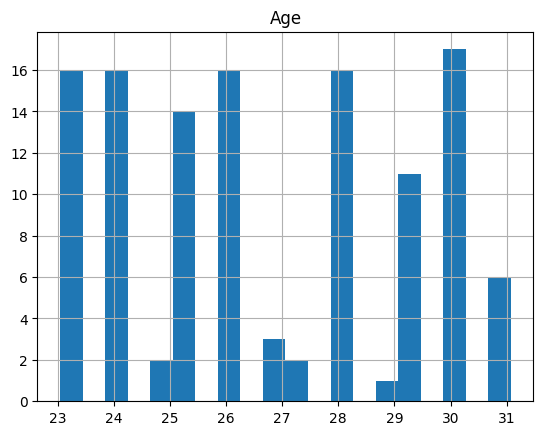

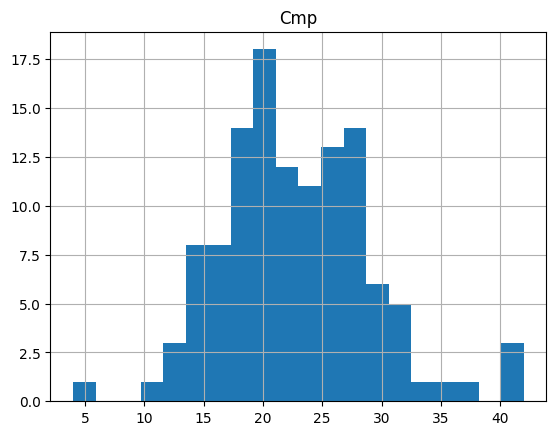

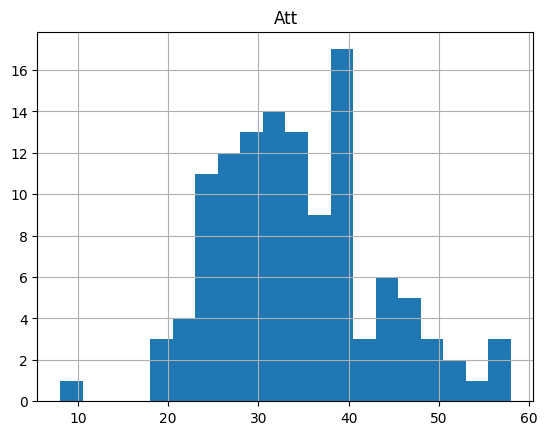

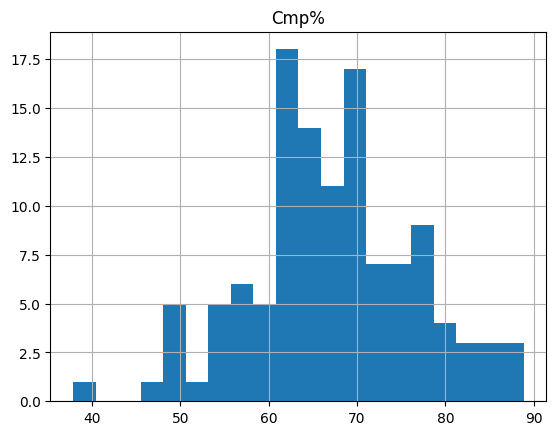

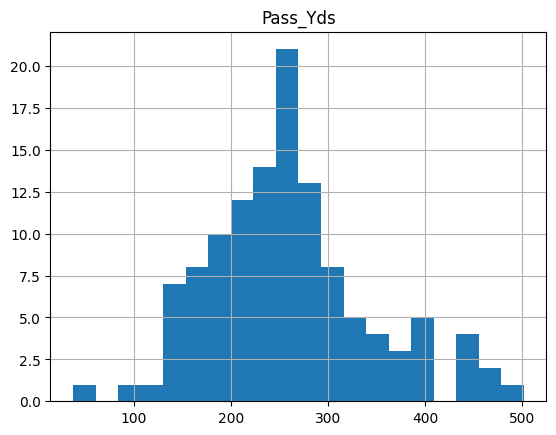

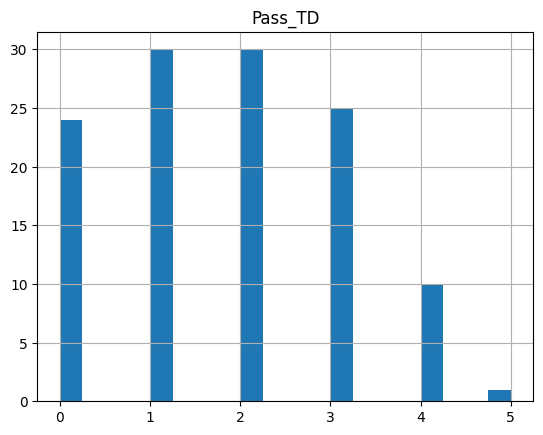

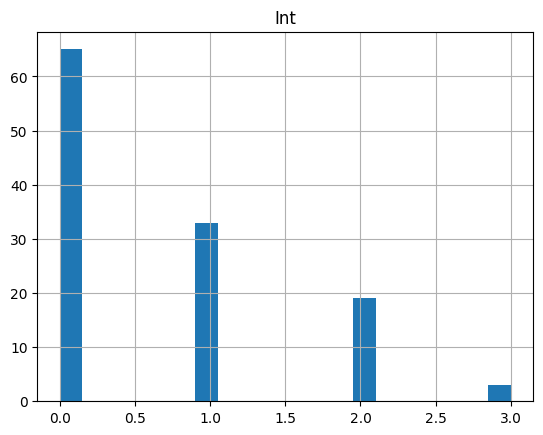

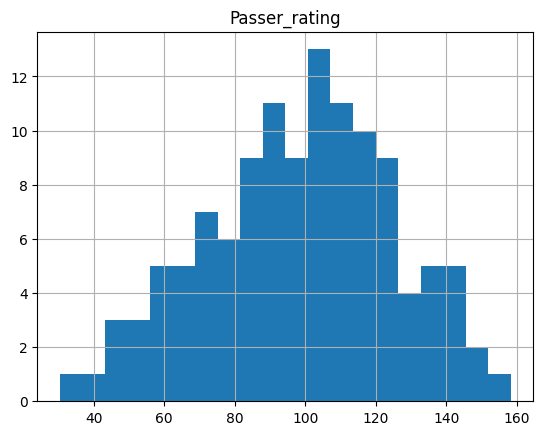

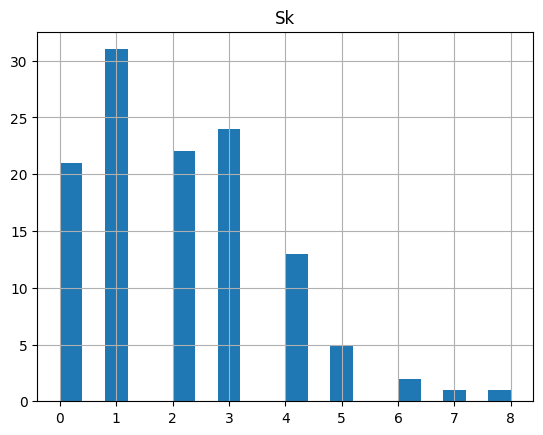

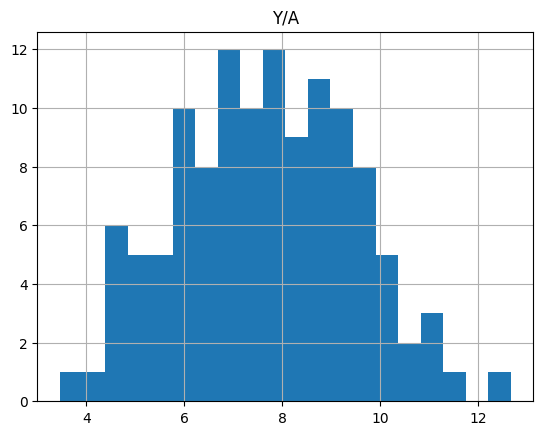

In [3]:
import matplotlib.pyplot as plt

for feature in features:
    features[feature].hist(bins=20)
    plt.title(feature)
    plt.show()

Shape of Features: (120, 9)
Shape of Target: (120,)


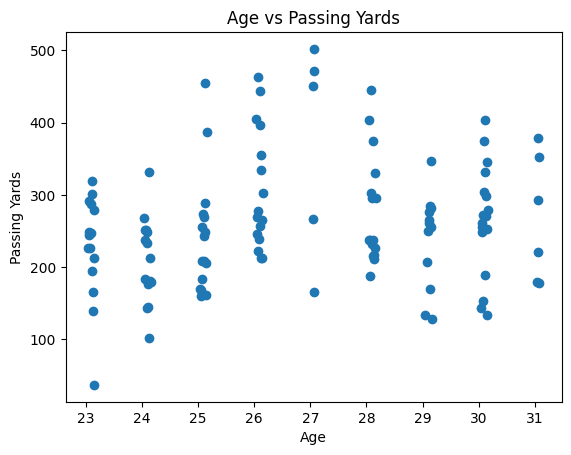

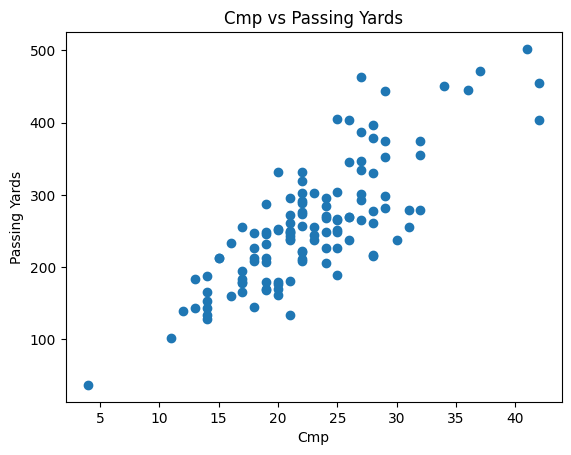

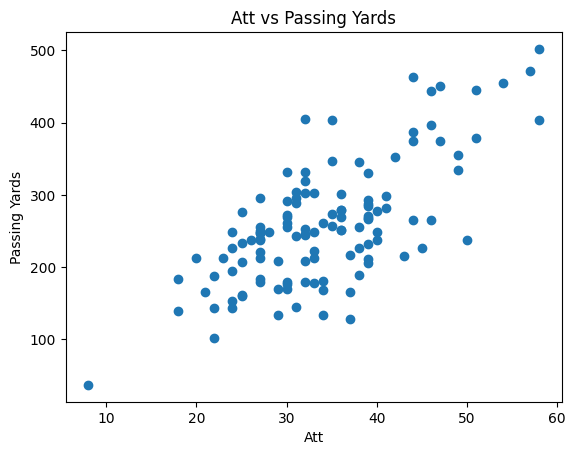

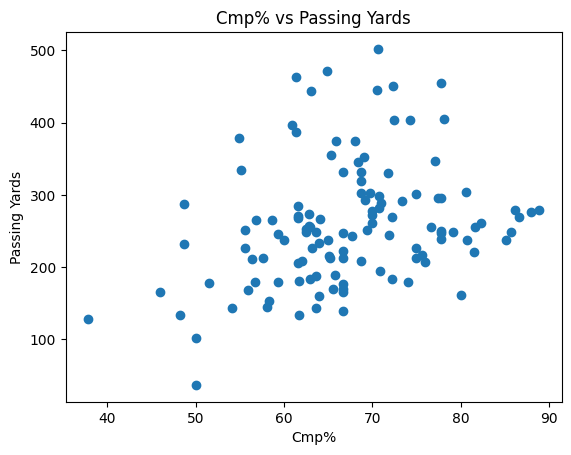

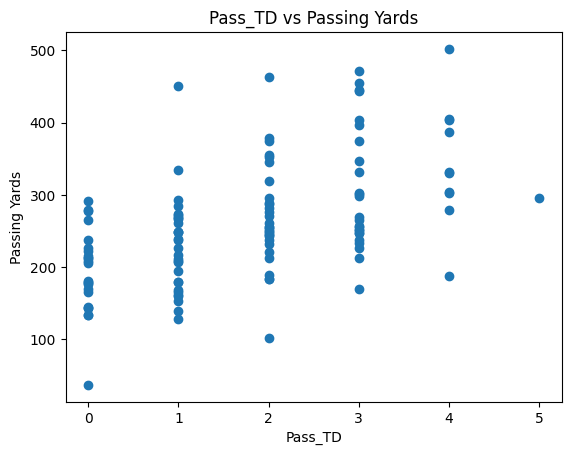

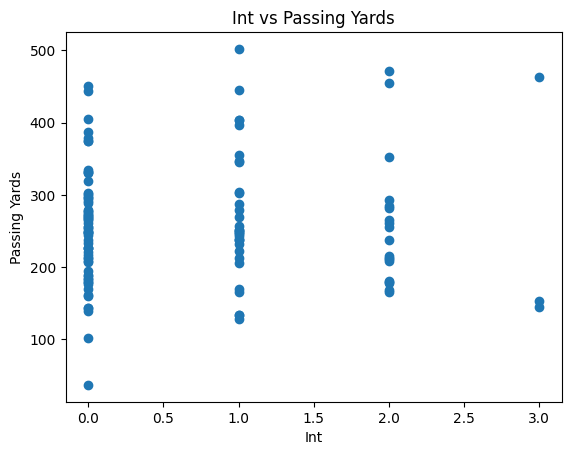

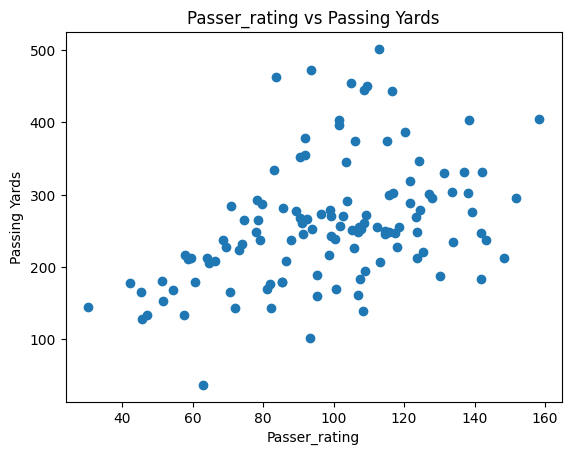

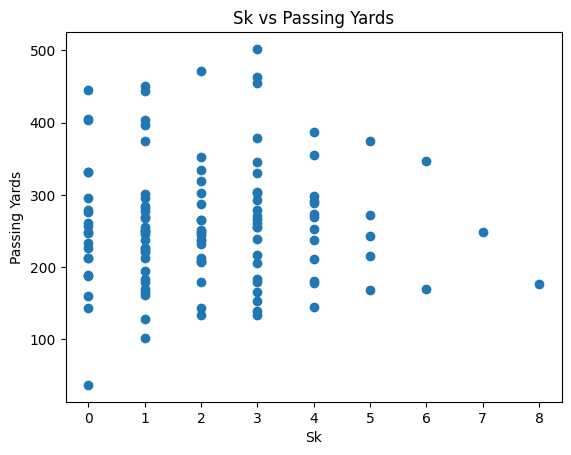

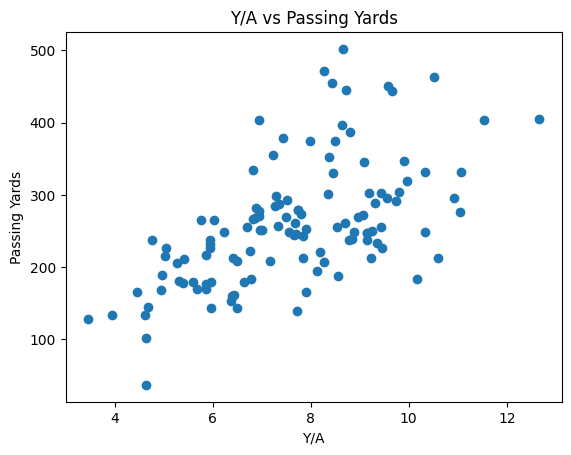

In [4]:
features = features.drop(columns='Pass_Yds')
target = df['Pass_Yds']

print(f'Shape of Features: {features.shape}\nShape of Target: {target.shape}')

for feature in features:
    plt.scatter(x=df[feature], y=target)
    plt.title(f'{feature} vs Passing Yards')
    plt.xlabel(feature)
    plt.ylabel('Passing Yards')
    plt.show()

<Axes: >

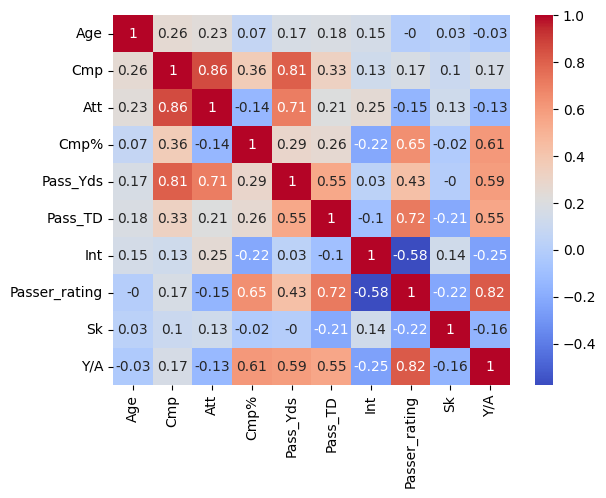

In [5]:
import seaborn as sns

cor_matrix = df[nummerical_cols].corr()
sns.heatmap(cor_matrix, annot=cor_matrix.round(2), cmap='coolwarm',)

In [6]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=.2, random_state=69)

print(X_train.shape, y_train.shape, X_test.shape, y_test.shape )

(96, 9) (96,) (24, 9) (24,)


In [7]:
from sklearn.linear_model import LinearRegression

linear_reg = LinearRegression() # Model using linear regression
linear_reg.fit(X_train,y_train) # Fit the model with our training data
linear_pred = linear_reg.predict(X_test) # Calc predictions

# Create lists for predicted, actual, and difference values
dif = []
table_data = []

for i in range(len(linear_pred)):
    predicted = linear_pred[i]
    actual = y_test.values[i]
    difference = actual - predicted
    dif.append(difference)

    # Append each row as a dictionary
    table_data.append({"Predicted": predicted, "Actual": actual, "Difference": difference})

# Convert the list of dictionaries into a pandas DataFrame
test_data = pd.DataFrame(table_data)
test_stats = test_data.describe(percentiles=[0.25,.5,.75])
# Display the DataFrame
print(test_data)
print(test_stats)



    Predicted  Actual  Difference
0      321.08  319.00       -2.08
1      268.66  238.00      -30.66
2      249.24  250.00        0.76
3      286.80  282.00       -4.80
4      183.17  178.00       -5.17
5      174.90  179.00        4.10
6      211.44  212.00        0.56
7      365.17  379.00       13.83
8        9.07   37.00       27.93
9      283.06  279.00       -4.06
10     190.14  195.00        4.86
11     260.76  261.00        0.24
12     201.13  188.00      -13.13
13     282.06  276.00       -6.06
14     372.35  375.00        2.65
15     286.66  279.00       -7.66
16     451.44  472.00       20.56
17     254.73  253.00       -1.73
18     418.35  444.00       25.65
19     212.48  208.00       -4.48
20     146.20  160.00       13.80
21     183.61  181.00       -2.61
22     172.33  168.00       -4.33
23     195.42  189.00       -6.42
       Predicted  Actual  Difference
count      24.00   24.00       24.00
mean      249.18  250.08        0.91
std        95.26   97.04       12.58
mi

In [8]:
# Dak's Stats vs SF
# https://www.pro-football-reference.com/players/P/PresDa01/gamelog/?opp_id=sfo

num_games = 3

dak_cmp_SF = 53/num_games
dak_att_SF = 81/num_games
dak_cmpPer_SF = 65.43
dak_td_SF = 6/num_games
dak_int_SF = 3/num_games
dak_pRate_SF = 98.4
dak_sk_SF = 5/num_games
dak_ydsAtt_SF = 7.8


# 49's Defensive Stats 2024 (So far)
# https://www.pro-football-reference.com/teams/sfo/2024.htm#all_defense
games = 6

SF_passAlw = (1291)/games
SF_int = 6/games
SF_sks = 16/games
SF_pasTDAlw = 8/games
SF_passCmp = 120/games
SF_passAtt = 195/games
SF_cmpPer = (SF_passCmp/SF_passAtt)*100
SF_yardsAtt = (SF_passAlw/SF_passAtt)

# Normalizing stats
norm_cmp = (dak_cmp_SF/SF_passCmp) * dak_cmp_SF
norm_att = (dak_att_SF/SF_passAtt) * dak_att_SF
norm_cmpPer = (dak_cmpPer_SF/SF_cmpPer) * dak_cmpPer_SF
norm_TD = (dak_td_SF/SF_pasTDAlw) * dak_td_SF
norm_int = (dak_int_SF/SF_int) * dak_int_SF
norm_sacks = (dak_sk_SF/SF_sks) * dak_sk_SF
norm_yardsAtt = (dak_ydsAtt_SF/SF_yardsAtt) * dak_ydsAtt_SF

# On October 27th 2024 Dak will be 31.25 years old
stats_vs_SF = [31.25, norm_cmp, norm_att, norm_cmpPer, norm_TD, norm_int, dak_pRate_SF, norm_sacks, norm_yardsAtt]


nummerical_cols.remove('Pass_Yds')
test = pd.DataFrame([stats_vs_SF], columns=nummerical_cols)

print(test)

    Age   Cmp   Att  Cmp%  Pass_TD  Int  Passer_rating   Sk  Y/A
0 31.25 15.61 22.43 69.57     3.00 1.00          98.40 1.04 9.19


In [9]:
predict = linear_reg.predict(test)
pass_yards = predict[0]
print(f'This Model predicts Dak Prescott will pass for {pass_yards:.2f} yards vs SF on 10/27/2024')

This Model predicts Dak Prescott will pass for 235.80 yards vs SF on 10/27/2024


In [10]:
dak_yds_SF = 632/num_games
norm_passYards = (dak_yds_SF/SF_passAlw) * pass_yards

print(f'Dak AVG Passing Yards vs SF: {dak_yds_SF:.2f}\nSF AVG Passing Yards Allowed in 2024: {SF_passAlw:.2f}\nPredicted Passing Yards by Dak: {pass_yards:.2f}\nNormalized Predicted Pass Yards: {norm_passYards:.2f}')


Dak AVG Passing Yards vs SF: 210.67
SF AVG Passing Yards Allowed in 2024: 215.17
Predicted Passing Yards by Dak: 235.80
Normalized Predicted Pass Yards: 230.87
